In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import cufflinks as cf
import matplotlib.pyplot as plt

cf.go_offline()
data = pd.read_csv(r'C:\Users\Abhinay\Downloads\UCI_Credit_Card.csv')
pd.pandas.set_option('display.max_columns',None)
data
# No Null or missing Values in DataSet

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# 1. Null value handling
# 2. Outlier handling
# 3. Scaling
# 4. Transformation
# 5. Encoding
# 6. Handle imbalanced data
# 7. Feature Selection
# 8. Dimension reduction
# 9. Duplicate

In [ ]:
# People with Age 30 are the mostly present in Data.
data['AGE'].iplot(kind='histogram', mode='markers', xTitle='Age')

In [2]:
# No null value in Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
#Dividing data in Default and Non-Default records
data_def = data[data['default.payment.next.month']==1]
data_no_def = data[data['default.payment.next.month']==0]

<AxesSubplot:>

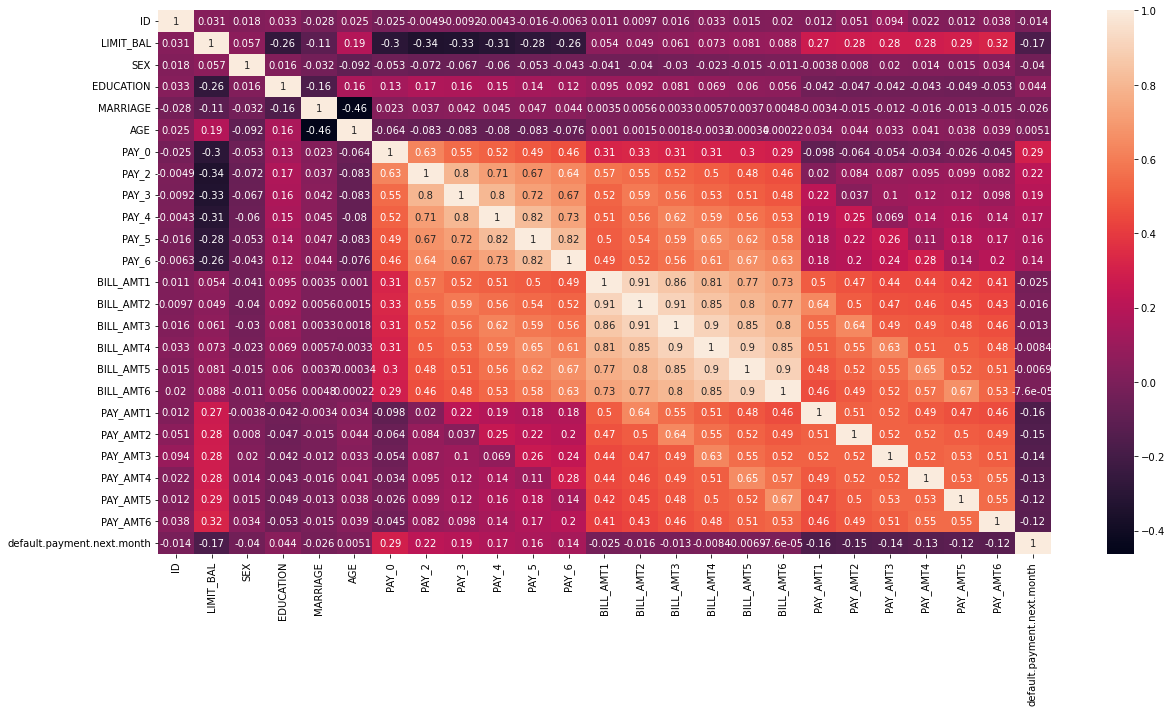

In [5]:
# Finding correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(method='spearman'), annot=True)

In [6]:
# Education=2 has highest defaults
data['EDUCATION'][data['default.payment.next.month']==1].iplot(kind='histogram')

In [ ]:
data['EDUCATION'][data['default.payment.next.month']==0].iplot(kind='histogram')

In [ ]:
data.describe()

<AxesSubplot:xlabel='LIMIT_BAL'>

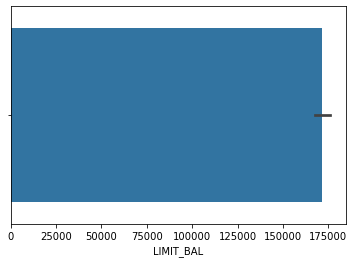

In [44]:
sns.barplot(x=data['LIMIT_BAL'])

In [ ]:
sns.barplot(data=data, x=data['PAY_0'])

In [ ]:
plt.subplot(1,2,1)
plt.bar(x=data['SEX'], height=1)
plt.subplot(1,2,2)
plt.bar(x=data['PAY_0'], height=1)
plt.show()

In [ ]:
sns.countplot(data=data, x='PAY_0')

In [25]:
# Default payments for different months in a year 
for i in range(6,12):
    unique_vals = data[data.columns[i]].unique()
    unique_vals.sort()
    print(data.columns[i]," - ", unique_vals)

PAY_0  -  [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_2  -  [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_3  -  [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_4  -  [-2 -1  0  1  2  3  4  5  6  7  8]
PAY_5  -  [-2 -1  0  2  3  4  5  6  7  8]
PAY_6  -  [-2 -1  0  2  3  4  5  6  7  8]


In [27]:
data['SEX'].unique()

array([2, 1], dtype=int64)

In [37]:
indep_dep_corr = data.corr(method='spearman').iloc[-1,:].abs()*100
indep_dep_corr.sort_values()

BILL_AMT6                       0.007612
AGE                             0.514886
BILL_AMT5                       0.685123
BILL_AMT4                       0.835706
BILL_AMT3                       1.266991
ID                              1.395195
BILL_AMT2                       1.555376
BILL_AMT1                       2.532683
MARRIAGE                        2.648979
SEX                             3.996058
EDUCATION                       4.436896
PAY_AMT5                       11.658709
PAY_AMT6                       12.144364
PAY_AMT4                       12.797860
PAY_AMT3                       13.938803
PAY_6                          14.252322
PAY_AMT2                       15.097740
PAY_5                          15.904328
PAY_AMT1                       16.049313
LIMIT_BAL                      16.958628
PAY_4                          17.368953
PAY_3                          19.477123
PAY_2                          21.691875
PAY_0                          29.221322
default.payment.

C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PAY_0', ylabel='count'>

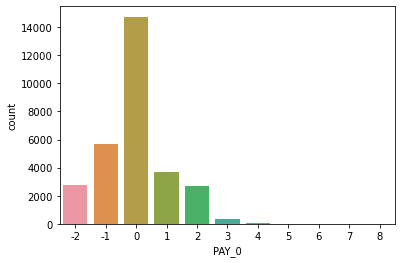

In [46]:
sns.countplot(data['PAY_0'])

C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PAY_2', ylabel='count'>

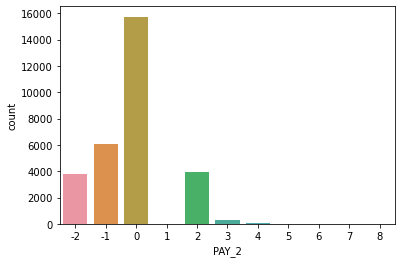

In [47]:
#Checking 
sns.countplot(data['PAY_2'])

C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PAY_3', ylabel='count'>

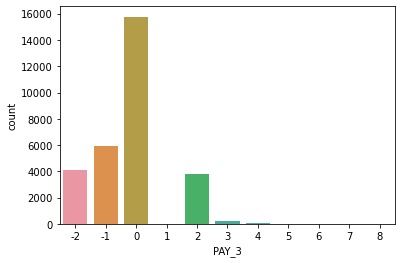

In [48]:
sns.countplot(data['PAY_3'])

C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PAY_4', ylabel='count'>

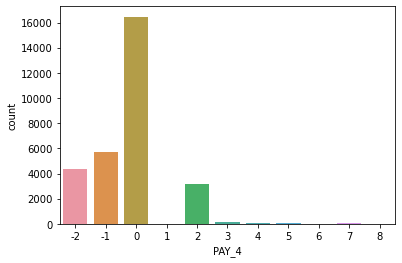

In [49]:
sns.countplot(data['PAY_4'])

C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PAY_5', ylabel='count'>

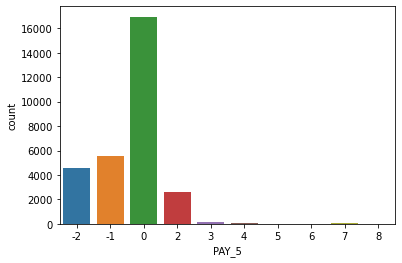

In [50]:
sns.countplot(data['PAY_5'])

C:\Users\Abhinay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='PAY_6', ylabel='count'>

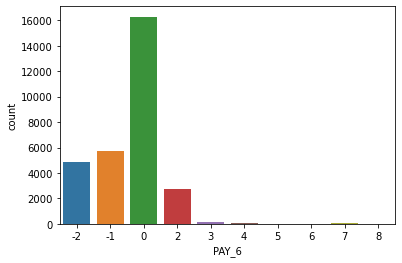

In [51]:
sns.countplot(data['PAY_6'])

In [32]:
data=data.loc[(data['PAY_0']!=0) & (data['PAY_0']!=-2) & (data['PAY_2']!=0) & (data['PAY_2']!=-2) & (data['PAY_3']!=0) & (data['PAY_3']!=-2) & (data['PAY_4']!=0) & (data['PAY_4']!=-2) & (data['PAY_5']!=0) & (data['PAY_5']!=-2) & (data['PAY_6']!=0) & (data['PAY_6']!=-2)]

In [48]:
data['PAY_0'].unique().size

9

In [50]:
# Checking unique value counts in each feature
for col in data:
    print(data[col].name ,'-->',data[col].unique().size)

ID --> 4061
LIMIT_BAL --> 60
SEX --> 2
EDUCATION --> 7
MARRIAGE --> 4
AGE --> 49
PAY_0 --> 9
PAY_2 --> 9
PAY_3 --> 9
PAY_4 --> 9
PAY_5 --> 8
PAY_6 --> 8
BILL_AMT1 --> 3121
BILL_AMT2 --> 3126
BILL_AMT3 --> 3076
BILL_AMT4 --> 3051
BILL_AMT5 --> 3054
BILL_AMT6 --> 3053
PAY_AMT1 --> 1888
PAY_AMT2 --> 1899
PAY_AMT3 --> 1866
PAY_AMT4 --> 1908
PAY_AMT5 --> 1867
PAY_AMT6 --> 1811
default.payment.next.month --> 2


In [54]:
# Finding invalid values in Bill_Amount 
for col in data:
    print(col ,'-->',data[col].unique().size)

ID --> 4061
LIMIT_BAL --> 60
SEX --> 2
EDUCATION --> 7
MARRIAGE --> 4
AGE --> 49
PAY_0 --> 9
PAY_2 --> 9
PAY_3 --> 9
PAY_4 --> 9
PAY_5 --> 8
PAY_6 --> 8
BILL_AMT1 --> 3121
BILL_AMT2 --> 3126
BILL_AMT3 --> 3076
BILL_AMT4 --> 3051
BILL_AMT5 --> 3054
BILL_AMT6 --> 3053
PAY_AMT1 --> 1888
PAY_AMT2 --> 1899
PAY_AMT3 --> 1866
PAY_AMT4 --> 1908
PAY_AMT5 --> 1867
PAY_AMT6 --> 1811
default.payment.next.month --> 2


In [59]:
# Check negative values in Bill amount and Pay amount
for col in range(12,24):
    print(data.iloc[:,col]<0)

ID                            57
LIMIT_BAL                     57
SEX                           57
EDUCATION                     57
MARRIAGE                      57
AGE                           57
PAY_0                         57
PAY_2                         57
PAY_3                         57
PAY_4                         57
PAY_5                         57
PAY_6                         57
BILL_AMT1                     57
BILL_AMT2                     57
BILL_AMT3                     57
BILL_AMT4                     57
BILL_AMT5                     57
BILL_AMT6                     57
PAY_AMT1                      57
PAY_AMT2                      57
PAY_AMT3                      57
PAY_AMT4                      57
PAY_AMT5                      57
PAY_AMT6                      57
default.payment.next.month    57
dtype: int64
ID                            51
LIMIT_BAL                     51
SEX                           51
EDUCATION                     51
MARRIAGE                      

In [ ]:
data.isnull().sum